In [ ]:
# from mmdet.apis import init_detector, inference_detector

# config_file = 'rtmdet_tiny_8xb32-300e_coco.py'
# checkpoint_file = 'rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
# model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
# inference_detector(model, 'demo/demo.jpg')

In [1]:
from mmcv.transforms import LoadImageFromFile
import matplotlib.pyplot as plt
import cv2

# backend_args = dict(channel_order='bgr')
backend_args = None

loader = LoadImageFromFile(to_float32=True, color_type='color', imdecode_backend='tifffile', backend_args=backend_args)
loader

LoadImageFromFile(ignore_empty=False, to_float32=True, color_type='color', imdecode_backend='tifffile', backend_args=None)

In [2]:
from pathlib import Path  

immagini_path = Path('/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/vessels/imgs')
paths = list(immagini_path.glob('*.tif'))

medie1, medie2, medie3 = [], [], []
dev1, dev2, dev3 = [], [], []
for idx,path in enumerate(paths):

    l = loader(results={'img_path': path})
    img = l['img']
    a,b,c = img[:,:,0], img[:,:,1], img[:,:,2]


    m1, m2, m3 = a.mean(), b.mean(), c.mean()
    s1, s2, s3 = a.std(), b.std(), c.std()
    
    medie1.append(m1)
    medie2.append(m2)
    medie3.append(m3)
    
    dev1.append(s1)
    dev2.append(s2)
    dev3.append(s3)
    if idx == 1:
        break
    



In [3]:
import numpy as np 

print(np.mean(medie1))
print(np.mean(medie2))
print(np.mean(medie3))

print(np.mean(dev1))    
print(np.mean(dev2))
print(np.mean(dev3))



211.08983
166.94046
121.94107
31.816828
33.392548
35.06375


In [4]:
img.shape

(1665, 2584, 3)

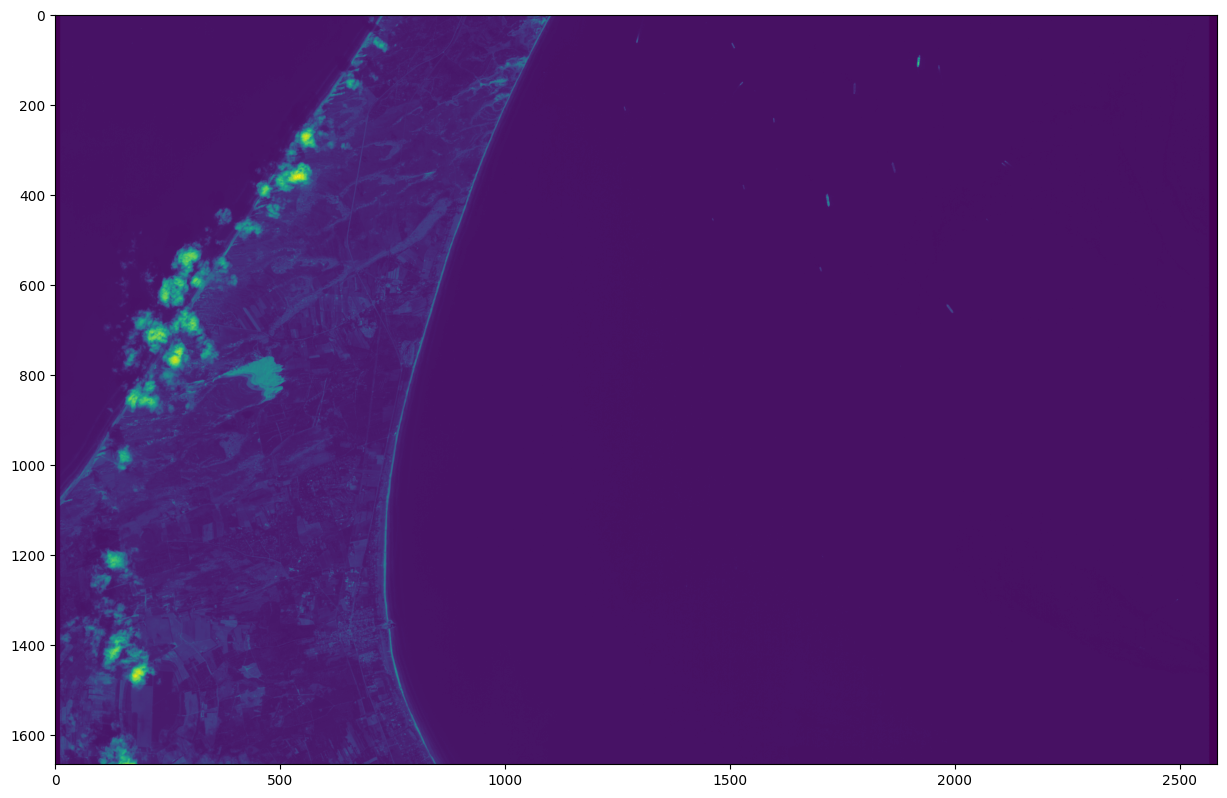

In [54]:
plt.figure(figsize=(15, 15))
plt.imshow(img[:,:,2])